In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output

# Loading dataset
DF = pd.read_csv('cleaned_departures.csv')
print(DF)

# Make a copy of the original dataframe
OriginalDF = DF.copy()
print(OriginalDF)

# Display all values in the 'Area' column
print("Unique Areas:")
print(DF['Area'].unique())

# Remove rows where 'Area' has NaN values
DF = DF.dropna(subset=['Area'])

# Print the updated 'Area' column after dropping NaNs
print("Updated Areas after dropping NaN:")
print(DF['Area'].unique())

# Drop the 'Name' column as it's not needed for analysis
DF = DF.drop(["Name"], axis=1)

# Save the 'Area' column as labels (target variable) and remap string labels to numerical labels
DFLabel = DF["Area"]
print("Original Labels:")
print(DFLabel)

# Remap 'Area' labels from strings to numbers
label_mapping = {
    "Americas": 0, 
    "Asia": 1, 
    "Europe": 2, 
    "Pacific": 3, 
    "Africa": 4
}
DFLabel = DFLabel.map(label_mapping)
print("Mapped Labels:")
print(DFLabel)

# Remove the 'Area' column from the original dataframe after extracting the labels
DF = DF.drop(["Area"], axis=1)

# Print the final dataframe
print("Dataframe without 'Area' column:")
print(DF)


    Departures  Domestic  International  FlagCarrier_Flights          Name  \
0         7422       0.0         7422.0               1925.0         Aruba   
1        11822    8395.0         3427.0              11496.0   Afghanistan   
2         4978    2907.0         2071.0               5891.0        Angola   
3         3742       8.0         3734.0               2249.0      Anguilla   
4         6535       0.0         6535.0               4085.0       Albania   
..         ...       ...            ...                  ...           ...   
219        807       0.0          807.0               1132.0         Samoa   
220        463       8.0          455.0                560.0         Yemen   
221      96704   76147.0        20557.0             102696.0  South Africa   
222      10390    6394.0         3996.0               6648.0        Zambia   
223       7577    2896.0         4681.0               3866.0      Zimbabwe   

         Area  
0    Americas  
1        Asia  
2      Africa  

PCA Components (4 components):
[[ 5.31530242e-01  5.22551502e-01  4.04364032e-01  5.30004962e-01]
 [-1.86515597e-01 -3.12278671e-01  9.09933027e-01 -1.99288358e-01]
 [-3.86880443e-01 -4.11514324e-01 -4.00074091e-02  8.24244436e-01]
 [ 7.30076062e-01 -6.78290440e-01 -8.31325622e-02 -6.53317448e-17]]
Explained Variance Ratio (4 components):
[8.68046226e-01 1.30514589e-01 1.43918454e-03 2.44985110e-33]
Loadings (4 components):
                          PC1       PC2       PC3           PC4
Departures           0.531530 -0.186516 -0.386880  7.300761e-01
Domestic             0.522552 -0.312279 -0.411514 -6.782904e-01
International        0.404364  0.909933 -0.040007 -8.313256e-02
FlagCarrier_Flights  0.530005 -0.199288  0.824244 -6.533174e-17
PC1: Departures, Domestic, International, FlagCarrier_Flights
PC2: International
PC3: Domestic, FlagCarrier_Flights
PC4: Departures, Domestic


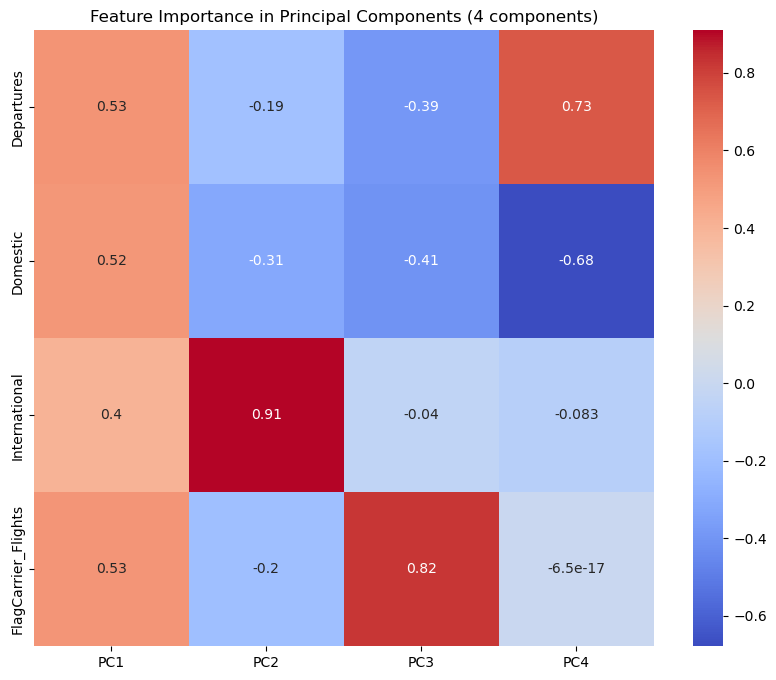

Explained Variance Ratio (2 components): [0.86804623 0.13051459]
PCA Components (2 components):
[[ 0.53153024  0.5225515   0.40436403  0.53000496]
 [-0.1865156  -0.31227867  0.90993303 -0.19928836]]


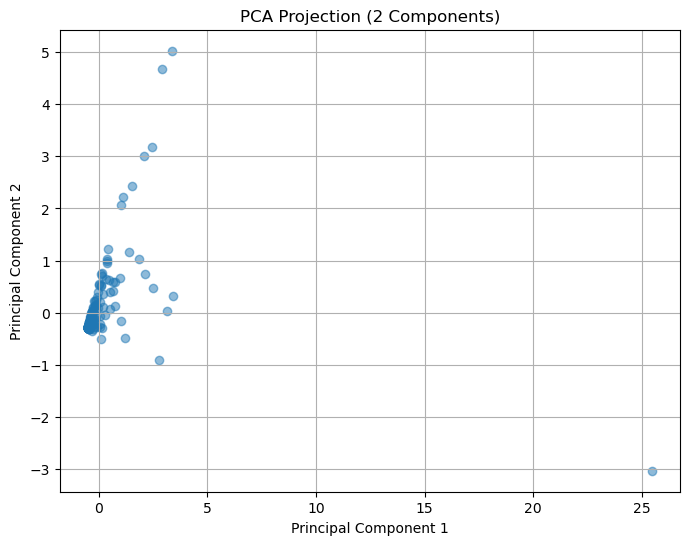

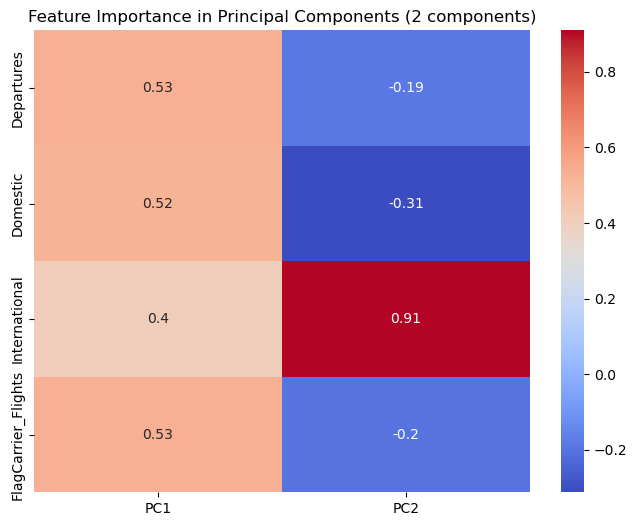

Explained Variance Ratio (3 components): [0.86804623 0.13051459 0.00143918]
PCA Components (3 components):
[[ 0.53153024  0.5225515   0.40436403  0.53000496]
 [-0.1865156  -0.31227867  0.90993303 -0.19928836]
 [-0.38688044 -0.41151432 -0.04000741  0.82424444]]


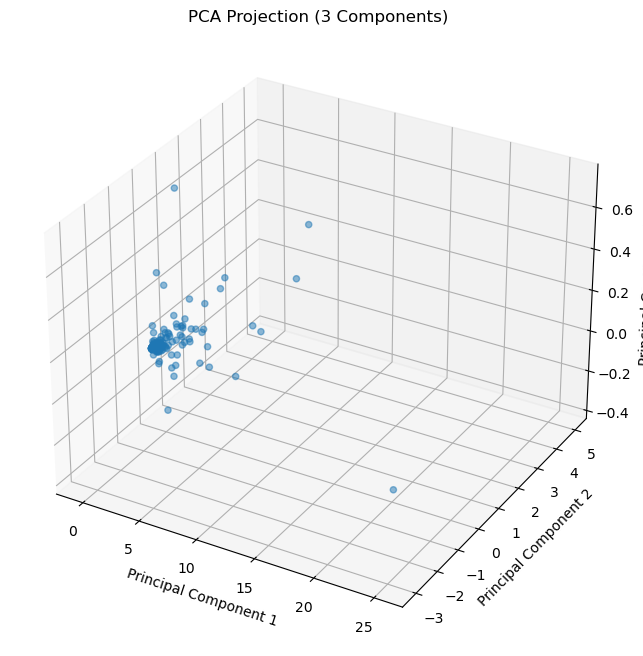

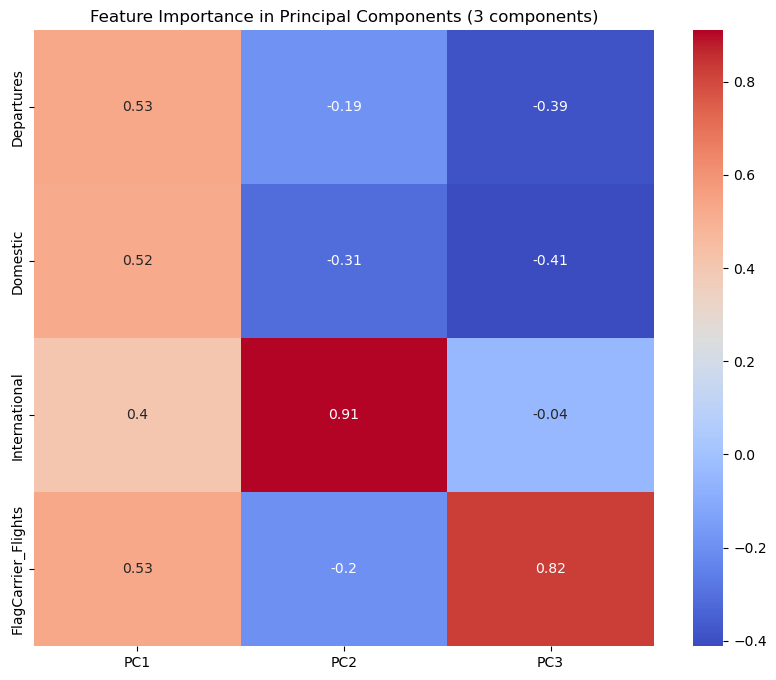

Cumulative Eigenvalues: [3.48803963 4.01248182 4.01826484 4.01826484]
Explained Variance Ratio: [8.68046226e-01 1.30514589e-01 1.43918454e-03 2.44985110e-33]


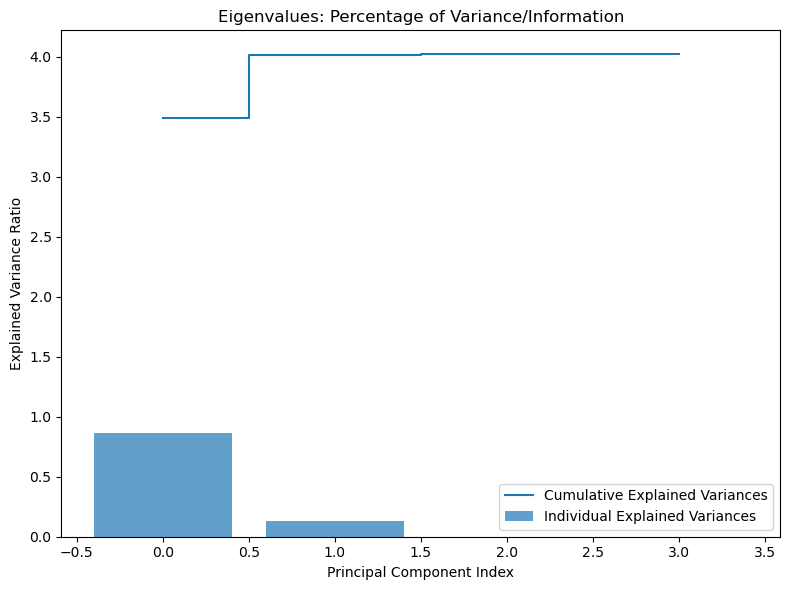

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#-------------------------------------------
# Standardize your dataset
#-------------------------------------------
scaler = StandardScaler()
DF_scaled = scaler.fit_transform(DF)

#-------------------------------------------
# Run PCA with 4 components
#-------------------------------------------
pca_4 = PCA(n_components=4)
pca_result_4 = pca_4.fit_transform(DF_scaled)

# Print PCA components and explained variance
print("PCA Components (4 components):")
print(pca_4.components_)
print("Explained Variance Ratio (4 components):")
print(pca_4.explained_variance_ratio_)

# Loadings DataFrame for 4 components
loadings_4 = pd.DataFrame(pca_4.components_.T, 
                          columns=[f'PC{i+1}' for i in range(pca_4.components_.shape[0])], 
                          index=DF.columns)
print("Loadings (4 components):")
print(loadings_4)

# Print important features using a threshold
threshold = 0.4
important_features = {}
for column in loadings_4.columns:
    important_features[column] = loadings_4.index[loadings_4[column].abs() > threshold].tolist()

# Print important features for each principal component
for pc, features in important_features.items():
    print(f"{pc}: {', '.join(features)}")

# Heatmap for feature importance in 4 components
plt.figure(figsize=(10, 8))
sns.heatmap(loadings_4, annot=True, cmap='coolwarm')
plt.title('Feature Importance in Principal Components (4 components)')
plt.show()

#-------------------------------------------
# Run PCA with 2 components
#-------------------------------------------
pca_2 = PCA(n_components=2)
pca_result_2 = pca_2.fit_transform(DF_scaled)

# Print explained variance and PCA components for 2 components
print("Explained Variance Ratio (2 components):", pca_2.explained_variance_ratio_)
print("PCA Components (2 components):")
print(pca_2.components_)

# Create a DataFrame with PCA results for 2 components
pca_df_2 = pd.DataFrame(data=pca_result_2, columns=['PC1', 'PC2'])

# Plot PCA projection for 2 components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df_2['PC1'], pca_df_2['PC2'], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection (2 Components)')
plt.grid()
plt.show()

# Feature loadings for 2 components
loadings_2 = pd.DataFrame(pca_2.components_.T, 
                          columns=['PC1', 'PC2'], 
                          index=DF.columns)

# Heatmap for feature importance in 2 components
plt.figure(figsize=(8, 6))
sns.heatmap(loadings_2, annot=True, cmap='coolwarm')
plt.title('Feature Importance in Principal Components (2 components)')
plt.show()

#-------------------------------------------
# Run PCA with 3 components
#-------------------------------------------
pca_3 = PCA(n_components=3)
pca_result_3 = pca_3.fit_transform(DF_scaled)

# Print explained variance and PCA components for 3 components
print("Explained Variance Ratio (3 components):", pca_3.explained_variance_ratio_)
print("PCA Components (3 components):")
print(pca_3.components_)

# Create a DataFrame with PCA results for 3 components
pca_df_3 = pd.DataFrame(data=pca_result_3, columns=['PC1', 'PC2', 'PC3'])

# Plot PCA projection for 3 components (3D plot)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df_3['PC1'], pca_df_3['PC2'], pca_df_3['PC3'], alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('PCA Projection (3 Components)')
plt.show()

# Feature loadings for 3 components
loadings_3 = pd.DataFrame(pca_3.components_.T, 
                          columns=['PC1', 'PC2', 'PC3'], 
                          index=DF.columns)

# Heatmap for feature importance in 3 components
plt.figure(figsize=(10, 8))
sns.heatmap(loadings_3, annot=True, cmap='coolwarm')
plt.title('Feature Importance in Principal Components (3 components)')
plt.show()

#-------------------------------------------
# Create Plot to Show Eigenvalues
#-------------------------------------------
fig3 = plt.figure(figsize=(8, 6))

# Calculate cumulative explained variance (eigenvalues)
ACCUM_eigenvalues = np.cumsum(pca_4.explained_variance_)

# Print explained variance and cumulative eigenvalues
print("Cumulative Eigenvalues:", ACCUM_eigenvalues)
print("Explained Variance Ratio:", pca_4.explained_variance_ratio_)

# Plot individual explained variances (bar plot)
plt.bar(range(len(pca_4.explained_variance_ratio_)), pca_4.explained_variance_ratio_, 
        alpha=0.7, align='center', label='Individual Explained Variances')

# Plot cumulative explained variances (step plot)
plt.step(range(len(ACCUM_eigenvalues)), ACCUM_eigenvalues, where='mid', label='Cumulative Explained Variances')

# Labels and title
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.title("Eigenvalues: Percentage of Variance/Information")
plt.legend(loc='best')

# Display the plot
plt.tight_layout()
plt.show()
